In [54]:
import sys
import os
sys.path.append('/home/karimik/Project/git/HeaDef/postprocess')
import utility as utl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [55]:
path = '../ebsd/output'
os.listdir(path)

['id_matrix.txt',
 'pairwise_attributes.txt',
 'EulerAngles.txt',
 'attributes.txt',
 'misOrientationAngle.txt']

In [56]:
#--- parse euler angles
euler_angles = pd.read_csv('%s/EulerAngles.txt'%path,sep=' ')

mori = pd.read_csv('%s/misOrientationAngle.txt'%path,sep=' ')

In [57]:
filtr = mori['#grain_i_ID'] == 84
mori#[filtr]

,#grain_i_ID,grain_j_ID,phi1,Phi,phi2,angle
0,1,2,153.55280,131.72970,116.970300,59.89713
1,1,33,261.61980,91.98252,130.999600,41.99782
2,1,92,45.24828,70.75931,44.813960,59.74895
3,2,14,134.74310,70.22479,224.840700,59.94544
4,2,92,149.92880,116.14470,172.694900,39.02650
...,...,...,...,...,...,...
14297,5360,5361,60.39607,69.10210,209.323200,42.64466
14298,5360,5362,280.09080,81.03504,7.260575,15.68192
14299,5361,5362,27.23269,130.87990,59.368960,58.14778
14300,5362,5363,49.21867,69.74934,135.736500,58.14222


In [58]:
# r = np.c_[euler_angles]
# H, edges = np.histogramdd(r, bins = (5, 8, 4))
# H.shape, edges[0].size, edges[1].size, edges[2].size


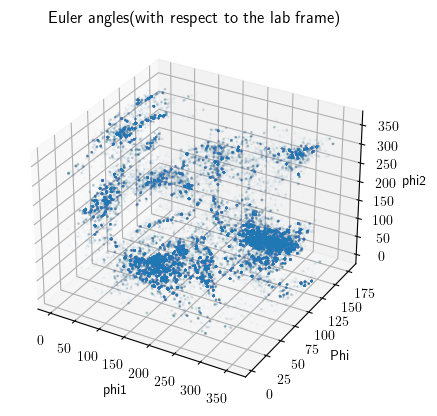

In [59]:

def randrange(n, vmin, vmax):
    """
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    """
    return (vmax - vmin)*np.random.rand(n) + vmin

def scatter(xs,ys,zs,s=1,alpha=1,set_title='',title=''):
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')


    # For each set of style and range settings, plot n random points in the box
    # defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
    for m, zlow, zhigh in [('o', -50, -25)]:
        ax.scatter(xs, ys, zs, marker=m,s=s,alpha=alpha)

    ax.set_xlabel('phi1')
    ax.set_ylabel('Phi')
    ax.set_zlabel('phi2')
    
    ax.set_title(set_title)

    plt.savefig(title,bbox_inches='tight', pad_inches=0.0,)
    plt.show()
    
    
xs = euler_angles['#phi1']
ys = euler_angles['Phi']
zs = euler_angles['phi2']
scatter(xs,ys,zs,
        alpha=0.01,
        set_title='Euler angles(with respect to the lab frame)',
       title='png/eulerAngles.png',
       )


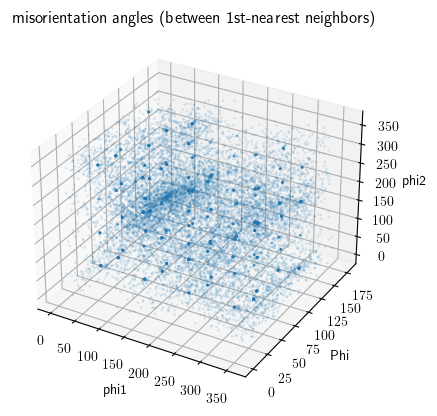

In [60]:
xs = mori['phi1']
ys = mori['Phi']
zs = mori['phi2']
scatter(xs,ys,zs,s=1,alpha=0.1,
        set_title='misorientation angles (between 1st-nearest neighbors)',
        title='png/mori.png',
       )

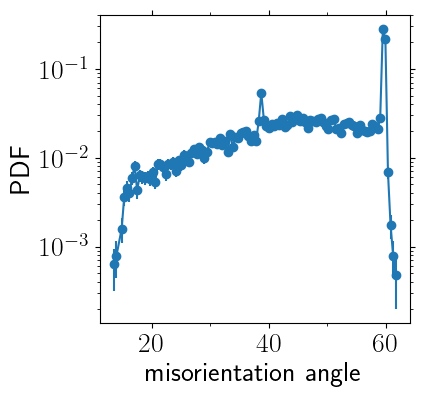

<AxesSubplot:xlabel='misorientation angle', ylabel='PDF'>

In [61]:
mori.angle
hist,edges,err=utl.GetPDF(mori.angle,n_per_decade=128,linscale=True)
utl.PltErr(edges,hist,yerr=err,
          yscale='log',
           xstr='misorientation angle',ystr='PDF',
           title='png/mori_PDF.png'
          )